Alphavantage/Marketaux relevance checking

In [81]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [82]:
# # minor issue with market aux data: in csv for relation, source ticker is filled with ticker and ticker is empty
# # need to rematch and fill in the data
# import os


# def fix_source_ticker(file_path, source_ticker_value):
#     """
#     Fix the 'source_ticker' issue by moving its values to the 'ticker' column
#     and replacing 'source_ticker' with the given source_ticker_value.
#     """
#     try:
#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(file_path)

#         # Fix the columns
#         df['ticker'] = df['source_ticker']
#         df['source_ticker'] = source_ticker_value

#         # Save the modified DataFrame back to the CSV
#         df.to_csv(file_path, index=False)
#         print(f"Fixed and saved: {file_path}")
#     except Exception as error:
#         print(f"Exception: {error}")

# # Define the folder path and source_ticker value
# folder_path = "dataset/news_maux"







In [83]:
# # Iterate over all files in the folder
# for filename in os.listdir(folder_path):
#     if "relation" in filename:  # Check if the filename contains "relation"
#         file_path = os.path.join(folder_path, filename)
#         print(file_path)
#         if os.path.isfile(file_path):  # Ensure it's a file
#             # Apply the source ticker fix
#             source_ticker_value = filename.split("_")[0]
#             fix_source_ticker(file_path, source_ticker_value)

In [84]:
# using Amazon data for testing

dfs_news_mt_main = []
dfs_news_mt_rel = []
mt_dates = [
    ('2023-01-31', '2023-02-02'),
    ('2023-02-01', '2023-02-03'),
    ('2023-02-02', '2023-02-04'),
    ('2023-02-03', '2023-02-05'),
    ('2023-02-04', '2023-02-06'),
    ('2023-02-05', '2023-02-07'),
    ('2023-02-06', '2023-02-08'),
    ('2023-02-07', '2023-02-09'),
    ('2023-02-08', '2023-02-10'),
    ('2023-02-09', '2023-02-11')
]
dfs_news_alpha_main = []
dfs_news_alpha_rel = []
alpha_dates = [
    ('2023-02-01', '2023-02-03'),
    ('2023-02-04', '2023-02-06'),
    ('2023-02-07', '2023-02-10')
]

for date in mt_dates:
    dfs_news_mt_main.append(pd.read_csv(f"dataset/news_maux/AMZN_main_{date[0]}_{date[1]}.csv"))
    dfs_news_mt_rel.append(pd.read_csv(f"dataset/news_maux/AMZN_relation_{date[0]}_{date[1]}.csv"))
    
for date in alpha_dates:
    dfs_news_alpha_main.append(pd.read_csv(f"dataset/news_alpha/AMZN_main_{date[0]}_{date[1]}.csv"))
    dfs_news_alpha_rel.append(pd.read_csv(f"dataset/news_alpha/AMZN_relation_{date[0]}_{date[1]}.csv"))
    
df_amzn = pd.read_csv("dataset/stocks/AMZN.csv")



In [85]:
df_news_mt_main_comb = pd.concat(dfs_news_mt_main, ignore_index=True)
df_news_mt_rel_comb = pd.concat(dfs_news_mt_rel, ignore_index=True)
df_news_alpha_main_comb = pd.concat(dfs_news_alpha_main, ignore_index=True)
df_news_alpha_rel_comb = pd.concat(dfs_news_alpha_rel, ignore_index=True)

# print(df_news_mt_main_comb)
# print(df_news_mt_rel_comb)
# print(df_news_alpha_main_comb)
# print(df_news_alpha_rel_comb)

In [86]:
# Marketaux

df_news_mt_t = df_news_mt_rel_comb[df_news_mt_rel_comb['ticker'] == df_news_mt_rel_comb['source_ticker']]
df_news_mt_t['time'] = pd.to_datetime(df_news_mt_t['time']).dt.tz_localize("UTC") \
                    .dt.tz_convert("America/New_York")
df_news_mt_t['date'] = df_news_mt_t['time'].dt.date

# print(df_news_mt_t)

/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/2792946133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_mt_t['time'] = pd.to_datetime(df_news_mt_t['time']).dt.tz_localize("UTC") \
/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/2792946133.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_mt_t['date'] = df_news_mt_t['time'].dt.date


In [87]:
mt_senti = df_news_mt_t.groupby('date')['sentiment_score'].sum().reset_index()

# print(mt_senti)

In [88]:
df_amzn_t = df_amzn[(df_amzn['time'] >= "2023-02-01") & (df_amzn['time'] <= "2023-02-10")]
df_amzn_t['time'] = pd.to_datetime(df_amzn_t['time']).dt.tz_localize("UTC") \
                    .dt.tz_convert("America/New_York")
df_amzn_t['change'] = df_amzn['close'].diff()
df_amzn_t['date'] = df_amzn_t['time'].dt.date

print(df_amzn_t)

         volumn      vwap     open   close      high      low  \
63   80450121.0  103.7156  102.530  105.15  106.2400  101.240   
64  157942363.0  111.3451  110.245  112.91  114.0000  108.880   
65  144343628.0  105.7858  105.260  103.39  108.7800  102.520   
66   81945199.0  102.2460  102.925  102.18  103.9484  100.650   
67  119316301.0  100.2393  101.170  102.11  102.4100   98.080   
68   74746154.0  100.1813  102.040  100.05  102.6699   98.775   
69   64568489.0   99.3668  101.320   98.24  101.7800   97.570   

                        time  num_trades  change        date  
63 2023-02-01 00:00:00-05:00      642368    2.02  2023-02-01  
64 2023-02-02 00:00:00-05:00     1209503    7.76  2023-02-02  
65 2023-02-03 00:00:00-05:00     1134293   -9.52  2023-02-03  
66 2023-02-06 00:00:00-05:00      625158   -1.21  2023-02-06  
67 2023-02-07 00:00:00-05:00      854814   -0.07  2023-02-07  
68 2023-02-08 00:00:00-05:00      548954   -2.06  2023-02-08  
69 2023-02-09 00:00:00-05:00      5607

/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/4122486499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amzn_t['time'] = pd.to_datetime(df_amzn_t['time']).dt.tz_localize("UTC") \
/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/4122486499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amzn_t['change'] = df_amzn['close'].diff()
/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/4122486499.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [89]:
amzn_stock = df_amzn_t[['date', 'change']].reset_index(drop=True)

print(amzn_stock)

         date  change
0  2023-02-01    2.02
1  2023-02-02    7.76
2  2023-02-03   -9.52
3  2023-02-06   -1.21
4  2023-02-07   -0.07
5  2023-02-08   -2.06
6  2023-02-09   -1.81


In [90]:
mt_corr = pd.merge(amzn_stock, mt_senti, on="date", how="left")
mt_corr['sentiment_score'] = mt_corr['sentiment_score'].fillna(0)

print(mt_corr)

stats.pearsonr(mt_corr['change'], mt_corr['sentiment_score'])

         date  change  sentiment_score
0  2023-02-01    2.02         0.998600
1  2023-02-02    7.76         0.112367
2  2023-02-03   -9.52        -0.703667
3  2023-02-06   -1.21         1.569000
4  2023-02-07   -0.07        -0.296000
5  2023-02-08   -2.06         1.513667
6  2023-02-09   -1.81         0.396933


PearsonRResult(statistic=0.23334020915786716, pvalue=0.6145648934195306)

In [91]:
# Alpha Vantage

df_news_alpha_t = df_news_alpha_rel_comb[df_news_alpha_rel_comb['ticker'] == df_news_alpha_rel_comb['source_ticker']]
df_news_alpha_t['time'] = pd.to_datetime(df_news_alpha_t['time']).dt.tz_localize("UTC") \
                    .dt.tz_convert("America/New_York")
df_news_alpha_t['date'] = df_news_alpha_t['time'].dt.date

alpha_senti = df_news_alpha_t.groupby('date')['ticker_sentiment_score'].sum().reset_index()

# print(alpha_senti)

/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/1551032851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_alpha_t['time'] = pd.to_datetime(df_news_alpha_t['time']).dt.tz_localize("UTC") \
/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/1551032851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_alpha_t['date'] = df_news_alpha_t['time'].dt.date


In [92]:
alpha_corr = pd.merge(amzn_stock, alpha_senti, on="date", how="left")
alpha_corr['sentiment_score'] = alpha_corr['ticker_sentiment_score'].fillna(0)

print(alpha_corr)

stats.pearsonr(alpha_corr['change'], alpha_corr['sentiment_score'])

         date  change  ticker_sentiment_score  sentiment_score
0  2023-02-01    2.02                1.460202         1.460202
1  2023-02-02    7.76                4.146781         4.146781
2  2023-02-03   -9.52                     NaN         0.000000
3  2023-02-06   -1.21                     NaN         0.000000
4  2023-02-07   -0.07                0.793833         0.793833
5  2023-02-08   -2.06                2.420291         2.420291
6  2023-02-09   -1.81                2.342571         2.342571


PearsonRResult(statistic=0.7228216811686471, pvalue=0.06646894883779635)

In [93]:
# running linear models on both data

def create_lin_model(s_corr, x_name, y_name):
    split_index = int(len(s_corr) * 0.8)
    s_corr_train = s_corr.iloc[:split_index] 
    s_corr_test = s_corr.iloc[split_index:]
    
    model = LinearRegression()
    model.fit(s_corr_train[[x_name]], s_corr_train[y_name])
    print(f"coef: {model.coef_[0]}, intercept: {model.intercept_}")
    
    pred_train = model.predict(s_corr_train[[x_name]])
    mse_train = mean_squared_error(pred_train, s_corr_train[y_name])
    pred_test = model.predict(s_corr_test[[x_name]])
    mse_test = mean_squared_error(pred_test, s_corr_test[y_name])
    print(f"sqrt: train: {np.sqrt(mse_train)}, test: {np.sqrt(mse_test)}")
    print(f"std: train: {np.std(s_corr_train[y_name])}, test:{np.std(s_corr_test[y_name])}")
#     print(f"sqrt: train: {mse_train}, test: {mse_test}")
#     print(f"std: train: {np.std(s_corr_train[y_name])}, test:{np.std(s_corr_test[y_name])}")
    


In [94]:
print("marketaux")
create_lin_model(mt_corr, 'sentiment_score', 'change')
print("alphavantage")
create_lin_model(alpha_corr, 'sentiment_score', 'change')

marketaux
coef: 2.307684912960689, intercept: -0.9795205918495682
sqrt: train: 5.246053616185315, test: 3.4617553025733856
std: train: 5.58908436150323, test:0.125
alphavantage
coef: 3.0923689197501227, intercept: -4.162736891887859
sqrt: train: 2.956097657688463, test: 5.142374030340933
std: train: 5.58908436150323, test:0.125


In [95]:
# alternative: use all alpha and maux data

TICKER = "AMZN"

dfs_news_mt_main = []
dfs_news_mt_rel = []

dfs_news_alpha_main = []
dfs_news_alpha_rel = []

FOLDER_MAUX = "dataset/news_maux"
FOLDER_ALPHA = "dataset/news_alpha"

for filename in os.listdir(FOLDER_MAUX):
    if "relation" in filename and TICKER in filename:  # Check if the filename contains the requirement
        file_path = os.path.join(FOLDER_MAUX, filename)
        if os.path.isfile(file_path):  # Ensure it's a file
            # load it
            dfs_news_mt_rel.append(pd.read_csv(file_path))
            
for filename in os.listdir(FOLDER_ALPHA):
    if "relation" in filename and TICKER in filename:  # Check if the filename contains the requirement
        file_path = os.path.join(FOLDER_ALPHA, filename)
        if os.path.isfile(file_path):  # Ensure it's a file
            # load it
            dfs_news_alpha_rel.append(pd.read_csv(file_path))

    
df_stock = pd.read_csv(f"dataset/stocks/{TICKER}.csv")


In [96]:
df_stock_t = df_stock
df_stock_t['time'] = pd.to_datetime(df_stock_t['time']).dt.tz_localize("UTC") \
                    .dt.tz_convert("America/New_York")
df_stock_t['change'] = df_stock['close'].diff()
df_stock_t['date'] = df_stock_t['time'].dt.date

# print(df_stock_t)

In [97]:

df_news_mt_rel_comb = pd.concat(dfs_news_mt_rel, ignore_index=True)

df_news_alpha_rel_comb = pd.concat(dfs_news_alpha_rel, ignore_index=True)

df_news_alpha_rel_comb["sentiment_score"] = df_news_alpha_rel_comb["ticker_sentiment_score"]

# print(df_news_mt_rel_comb)

# print(df_news_alpha_rel_comb)



In [98]:
df_news_mt_t = df_news_mt_rel_comb[df_news_mt_rel_comb['ticker'] == df_news_mt_rel_comb['source_ticker']]
df_news_mt_t['time'] = pd.to_datetime(df_news_mt_t['time']).dt.tz_localize("UTC") \
                    .dt.tz_convert("America/New_York")
df_news_mt_t['date'] = df_news_mt_t['time'].dt.date

mt_senti = df_news_mt_t.groupby('date')['sentiment_score'].sum().reset_index()



df_news_alpha_t = df_news_alpha_rel_comb[df_news_alpha_rel_comb['ticker'] == df_news_alpha_rel_comb['source_ticker']]
df_news_alpha_t['time'] = pd.to_datetime(df_news_alpha_t['time']).dt.tz_localize("UTC") \
                    .dt.tz_convert("America/New_York")
df_news_alpha_t['date'] = df_news_alpha_t['time'].dt.date

alpha_senti = df_news_alpha_t.groupby('date')['sentiment_score'].sum().reset_index()

# print(mt_senti)

# print(alpha_senti)

/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/669259158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_mt_t['time'] = pd.to_datetime(df_news_mt_t['time']).dt.tz_localize("UTC") \
/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/669259158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_mt_t['date'] = df_news_mt_t['time'].dt.date
/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/669259158.py:11: SettingWithCopyWarning: 
A value is tryi

In [99]:
df_stock_simp = df_stock_t[['date', 'change']].reset_index(drop=True)


In [100]:
mt_corr = pd.merge(df_stock_simp, mt_senti, on="date", how="left")
# mt_corr['sentiment_score'] = mt_corr['sentiment_score'].fillna(0)
mt_corr_cleaned = mt_corr.dropna()
# print(mt_corr_cleaned)
stats.pearsonr(mt_corr_cleaned['change'], mt_corr_cleaned['sentiment_score'])

PearsonRResult(statistic=0.18265331730426804, pvalue=0.3929573848644098)

In [101]:
alpha_corr = pd.merge(df_stock_simp, alpha_senti, on="date", how="left")
alpha_corr_cleaned = alpha_corr.dropna()
# print(alpha_corr_cleaned)
stats.pearsonr(alpha_corr_cleaned['change'], alpha_corr_cleaned['sentiment_score'])

PearsonRResult(statistic=0.4556635394995359, pvalue=0.01139102123437579)

In [102]:
print("marketaux")
create_lin_model(mt_corr_cleaned, 'sentiment_score', 'change')
print("alphavantage")
create_lin_model(alpha_corr_cleaned, 'sentiment_score', 'change')

marketaux
coef: 0.18461804197070014, intercept: -0.5895174774507684
sqrt: train: 3.1585149720001287, test: 3.518073706867504
std: train: 3.1621948792403067, test:3.4589501297359044
alphavantage
coef: 1.0369837891758036, intercept: -1.7896508000611582
sqrt: train: 2.0458262791816884, test: 1.6610584231921506
std: train: 2.284572656367536, test:1.906975499463893


In [103]:
# next: convert to separate out positive and negative values as two variables 

df_news_mt_rel_comb["pos_sentiment"] = df_news_mt_rel_comb["sentiment_score"].apply(lambda x: x if x > 0 else 0)
df_news_mt_rel_comb["neg_sentiment"] = df_news_mt_rel_comb["sentiment_score"].apply(lambda x: x if x < 0 else 0)
df_news_alpha_rel_comb["pos_sentiment"] = df_news_alpha_rel_comb["sentiment_score"].apply(lambda x: x if x > 0 else 0)
df_news_alpha_rel_comb["neg_sentiment"] = df_news_alpha_rel_comb["sentiment_score"].apply(lambda x: x if x < 0 else 0)




In [104]:
# print(df_news_mt_rel_comb)
# print(df_news_alpha_rel_comb)

In [105]:
def group_by_date(df_news, summed_columns):
    df_news_t = df_news[df_news['ticker'] == df_news['source_ticker']]
    df_news_t['time'] = pd.to_datetime(df_news_t['time']).dt.tz_localize("UTC") \
                        .dt.tz_convert("America/New_York")
    df_news_t['date'] = df_news_t['time'].dt.date

    senti = df_news_t.groupby('date')[summed_columns].sum().reset_index()
    return senti


In [106]:
mt_senti = group_by_date(df_news_mt_rel_comb, ["pos_sentiment", "neg_sentiment"])
alpha_senti = group_by_date(df_news_alpha_rel_comb, ["pos_sentiment", "neg_sentiment"])

/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/2894026568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_t['time'] = pd.to_datetime(df_news_t['time']).dt.tz_localize("UTC") \
/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/2894026568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_t['date'] = df_news_t['time'].dt.date
/var/folders/0q/kv5wlvmd4wdc2_bz7dkwlj180000gn/T/ipykernel_18466/2894026568.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [118]:
def calc_pearsonr(df_stock_simp, senti, column):
    corr = pd.merge(df_stock_simp, senti, on="date", how="left")
    # mt_corr['sentiment_score'] = mt_corr['sentiment_score'].fillna(0)
    corr_cleaned = corr.dropna()
    # print(corr_cleaned)
    print(f"{column}:" + str(stats.pearsonr(corr_cleaned['change'], corr_cleaned[column])))
    return corr_cleaned

In [108]:
print("market aux data")
calc_pearsonr(df_stock_simp, mt_senti, "pos_sentiment")
calc_pearsonr(df_stock_simp, mt_senti, "neg_sentiment")
print("alphavantage data")
calc_pearsonr(df_stock_simp, alpha_senti, "pos_sentiment")
calc_pearsonr(df_stock_simp, alpha_senti, "neg_sentiment")

market aux data
PearsonRResult(statistic=0.08307314811083241, pvalue=0.6995588069486858)
PearsonRResult(statistic=0.34782026323918985, pvalue=0.09581912905458306)
alphavantage data
PearsonRResult(statistic=0.4029789273748825, pvalue=0.027244468918106363)
PearsonRResult(statistic=0.07541822814227726, pvalue=0.6920348962900118)


last one performed very badly

In [109]:
print(df_stock_simp)

           date  change
0    2022-10-31     NaN
1    2022-11-01   -5.65
2    2022-11-02   -4.67
3    2022-11-03   -2.82
4    2022-11-04    1.68
..          ...     ...
497  2024-10-23   -4.99
498  2024-10-24    1.67
499  2024-10-25    1.45
500  2024-10-28    0.56
501  2024-10-29    2.44

[502 rows x 2 columns]


In [110]:
# check relevancy for all tickers:

tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL', 'MSFT', 'IBM', 'ORCL', 'NVDA', 'INTC']



In [111]:
def get_stock_diff(df_stock):
    df_stock_t = df_stock
    df_stock_t['time'] = pd.to_datetime(df_stock_t['time']).dt.tz_localize("UTC") \
                        .dt.tz_convert("America/New_York")
    df_stock_t['change'] = df_stock['close'].diff()
    df_stock_t['date'] = df_stock_t['time'].dt.date
    return df_stock_t

def get_news_rel(ticker, datafolder_path):
    dfs_news_rel = []
    for filename in os.listdir(datafolder_path):
        if "relation" in filename and ticker in filename:  # Check if the filename contains the requirement
            file_path = os.path.join(datafolder_path, filename)
            if os.path.isfile(file_path):  # Ensure it's a file
                # try load it
                try:
                    dfs_news_rel.append(pd.read_csv(file_path))
                except Exception as e:
                    print(e)
    if len(dfs_news_rel) == 0:
        return pd.DataFrame()
    df_news_rel_comb = pd.concat(dfs_news_rel, ignore_index=True)
    if "sentiment_score" not in df_news_rel_comb.columns:
        df_news_rel_comb["sentiment_score"] = df_news_rel_comb["ticker_sentiment_score"]
    return df_news_rel_comb


    

In [123]:
import matplotlib.pyplot as plt

def make_plot(df, title):
    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df['sentiment_score'], df['change'], color='blue', alpha=0.7, label='Data Points')

    # Adding labels and title
    plt.xlabel('Sentiment Score')
    plt.ylabel('Change')
    plt.title(title)

    # Adding a trendline
    z = np.polyfit(df['sentiment_score'], df['change'], 1)  # Linear fit (degree 1)
    p = np.poly1d(z)
    plt.plot(df['sentiment_score'], p(df['sentiment_score']), color='red', label='Trendline')

    # Add legend and grid
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()


In [116]:
import warnings
warnings.filterwarnings('ignore')

for ticker in tickers:
    print(ticker)
    df_stock = pd.read_csv(f"dataset/stocks/{ticker}.csv")
    df_stock_diff = get_stock_diff(df_stock)
    news_rel_mt = get_news_rel(ticker, FOLDER_MAUX)
    news_rel_alpha = get_news_rel(ticker, FOLDER_ALPHA)
    if news_rel_mt.empty or news_rel_alpha.empty:
        continue
    news_rel_mt["pos_sentiment"] = news_rel_mt["sentiment_score"].apply(lambda x: x if x > 0 else 0)
    news_rel_mt["neg_sentiment"] = news_rel_mt["sentiment_score"].apply(lambda x: x if x < 0 else 0)
    news_rel_alpha["pos_sentiment"] = news_rel_alpha["sentiment_score"].apply(lambda x: x if x > 0 else 0)
    news_rel_alpha["neg_sentiment"] = news_rel_alpha["sentiment_score"].apply(lambda x: x if x < 0 else 0)
    mt_senti = group_by_date(news_rel_mt, ["pos_sentiment", "neg_sentiment"])
    alpha_senti = group_by_date(news_rel_alpha, ["pos_sentiment", "neg_sentiment"])
    print("market aux data")
    calc_pearsonr(df_stock_simp, mt_senti, "pos_sentiment")
    calc_pearsonr(df_stock_simp, mt_senti, "neg_sentiment")
    print("alphavantage data")
    calc_pearsonr(df_stock_simp, alpha_senti, "pos_sentiment")
    calc_pearsonr(df_stock_simp, alpha_senti, "neg_sentiment")

META
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
market aux data
pos_sentiment:PearsonRResult(statistic=0.20014101009186022, pvalue=0.34840895367626223)
neg_sentiment:PearsonRResult(statistic=0.34587460189900643, pvalue=0.09781723204233266)
alphavantage data
pos_sentiment:PearsonRResult(statistic=0.5989479093743957, pvalue=0.039598979980494206)
neg_sentiment:PearsonRResult(statistic=0.1544092529065775, pvalue=0.6318319876691982)
AAPL
market aux data
pos_sentiment:Pearso

META
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
market aux data
sentiment_score:PearsonRResult(statistic=0.3616211512671999, pvalue=0.0825076795979331)


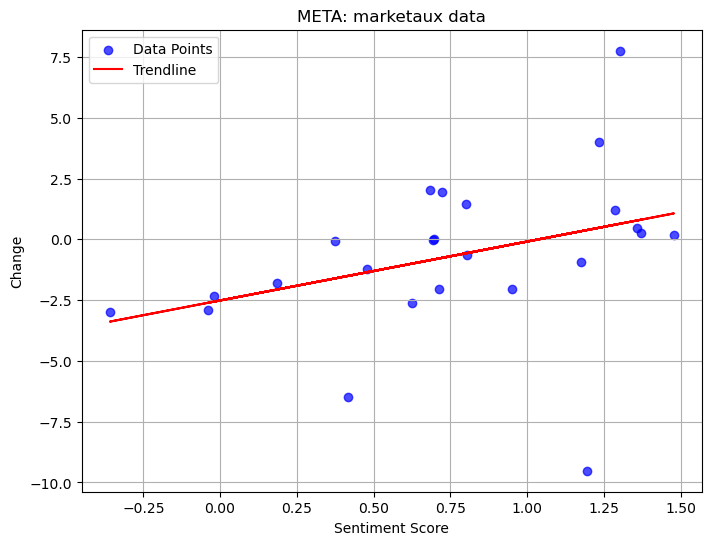

alphavantage data
sentiment_score:PearsonRResult(statistic=0.52996812486348, pvalue=0.07634549836925066)


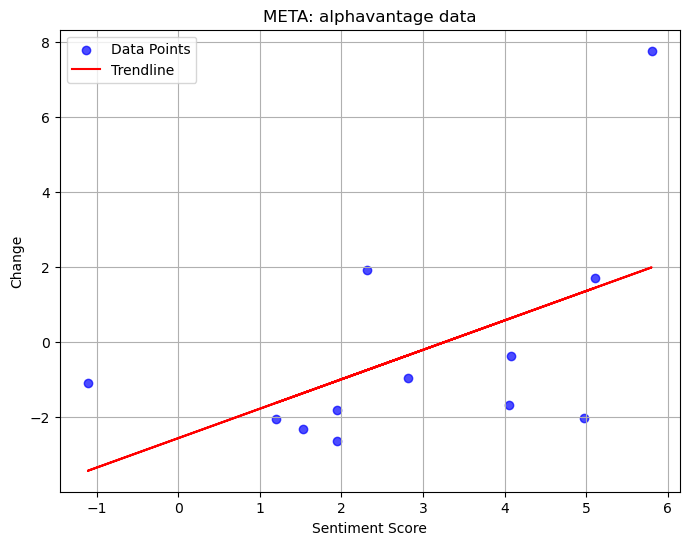

AAPL
market aux data
sentiment_score:PearsonRResult(statistic=0.041509535501320874, pvalue=0.8472870416708573)


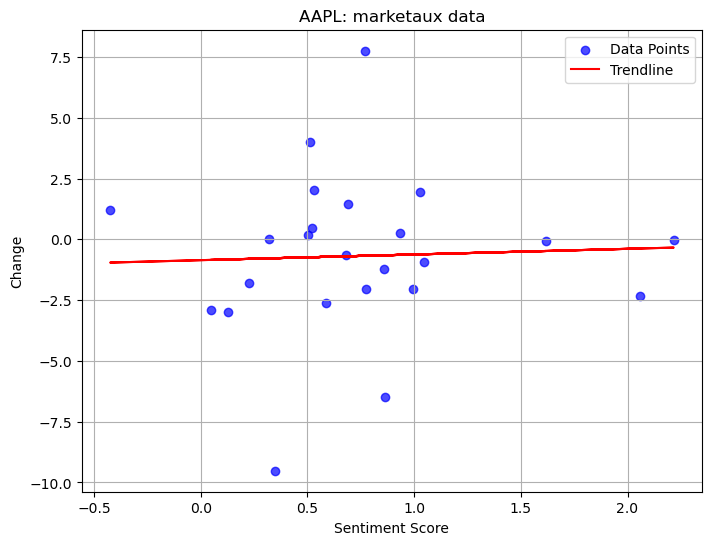

alphavantage data
sentiment_score:PearsonRResult(statistic=0.3934905777825768, pvalue=0.03829900280497882)


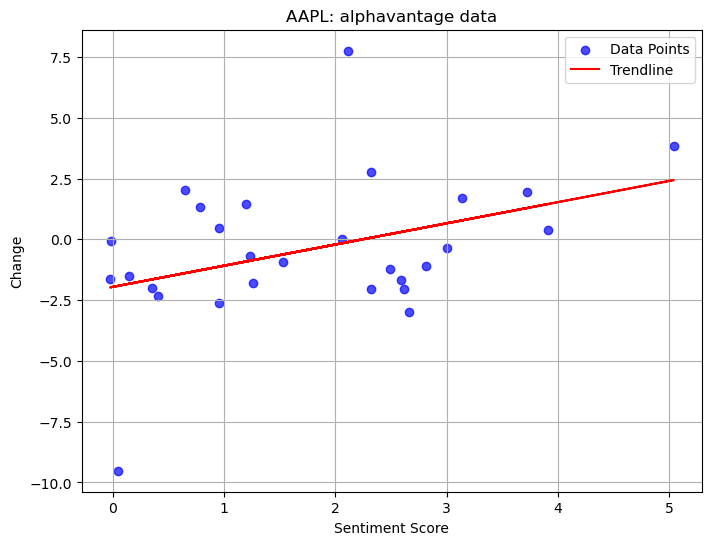

AMZN
market aux data
sentiment_score:PearsonRResult(statistic=0.18265331730426804, pvalue=0.3929573848644098)


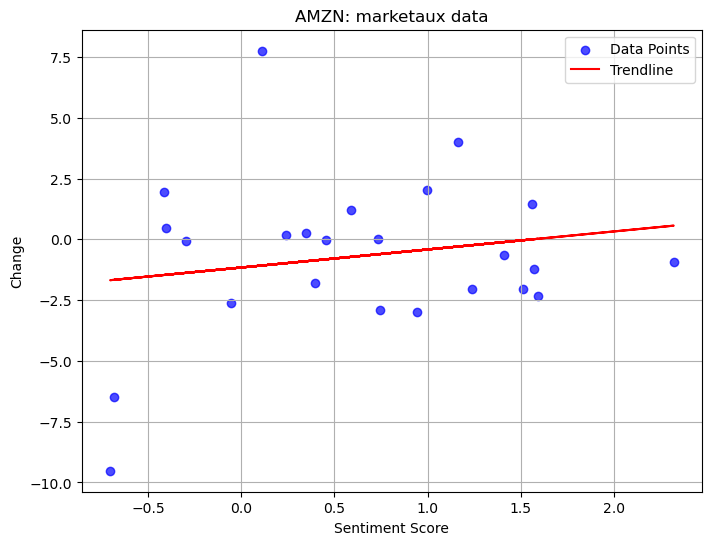

alphavantage data
sentiment_score:PearsonRResult(statistic=0.4556635394995359, pvalue=0.01139102123437579)


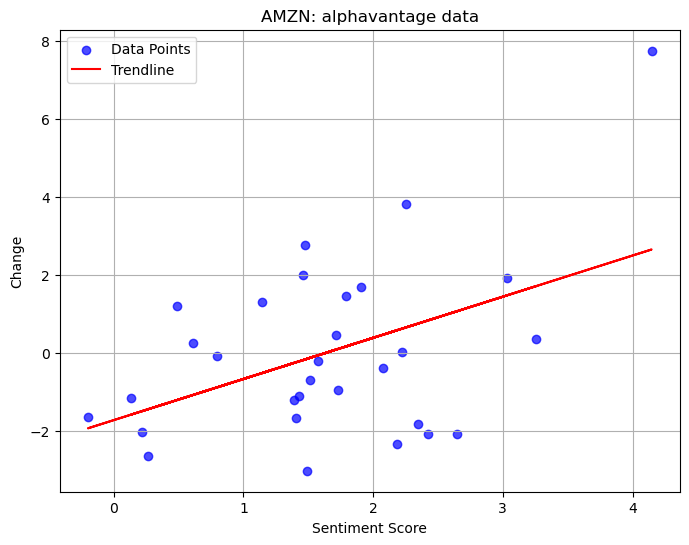

NFLX
market aux data
sentiment_score:PearsonRResult(statistic=0.6112097706750635, pvalue=0.0015086747347881411)


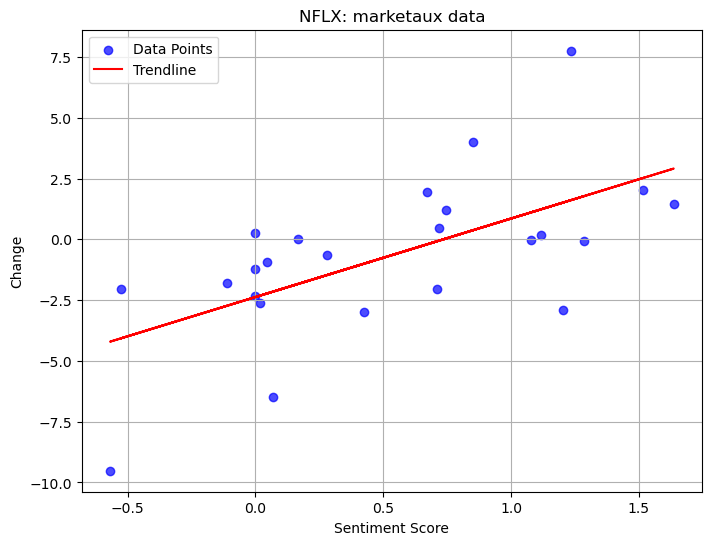

alphavantage data
sentiment_score:PearsonRResult(statistic=0.40757870498137627, pvalue=0.03483749549637901)


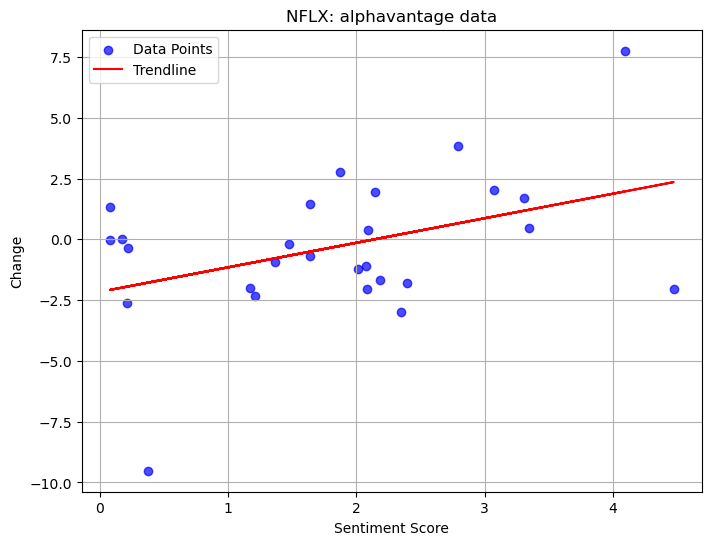

GOOGL
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
MSFT
market aux data
sentiment_score:PearsonRResult(statistic=0.4110740894015317, pvalue=0.04598265194109045)


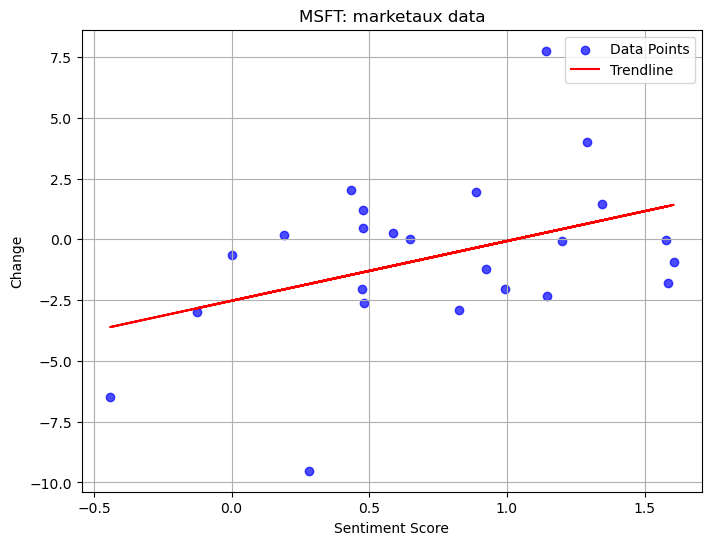

alphavantage data
sentiment_score:PearsonRResult(statistic=0.20409528310520905, pvalue=0.4656244531256403)


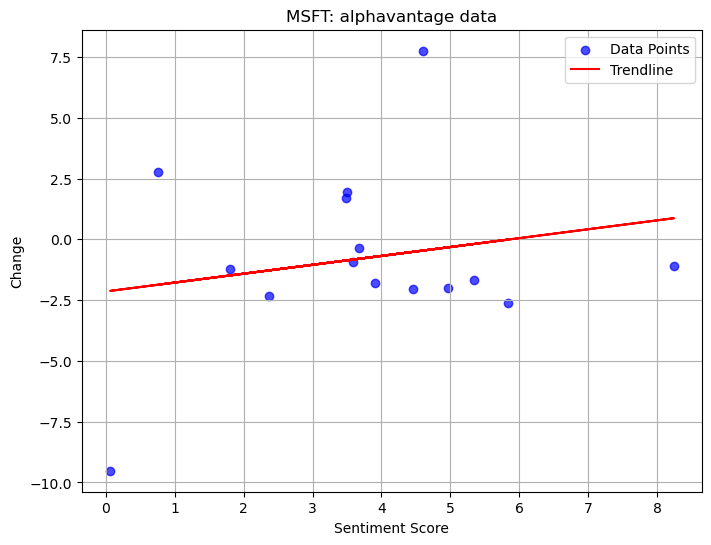

IBM
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
market aux data
sentiment_score:PearsonRResult(statistic=-0.08528687948772004, pvalue=0.6919300032947882)


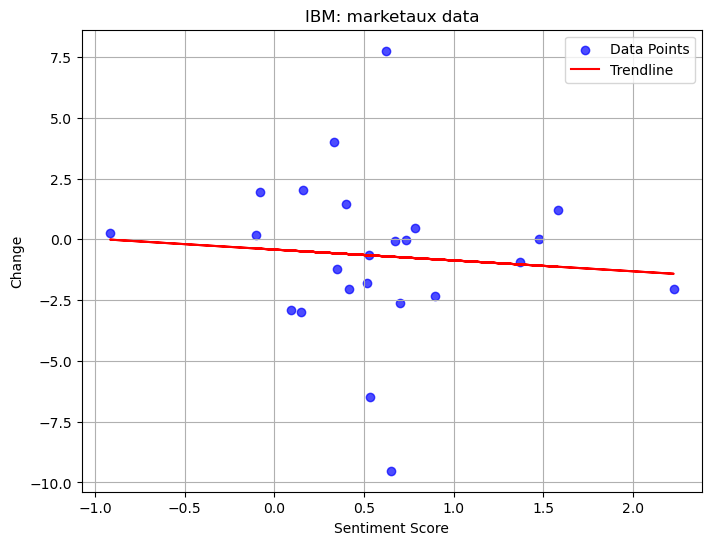

alphavantage data
sentiment_score:PearsonRResult(statistic=0.4206074804159792, pvalue=0.02583334595471822)


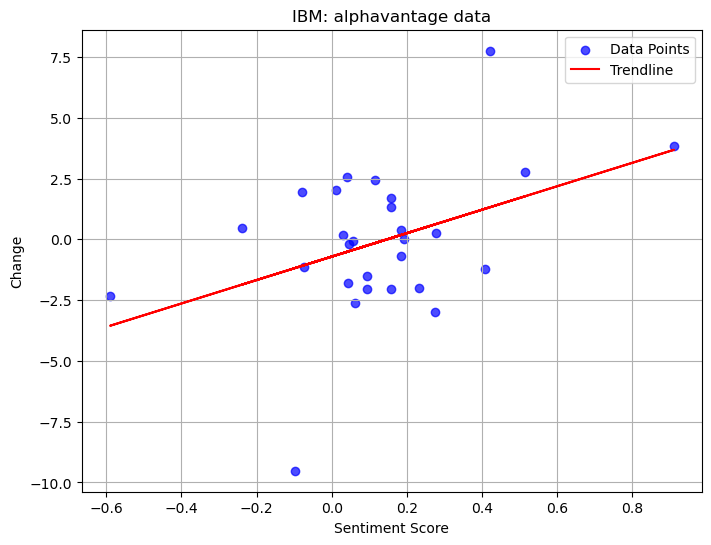

ORCL
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
market aux data
sentiment_score:PearsonRResult(statistic=0.11809118659423137, pvalue=0.5915119992463608)


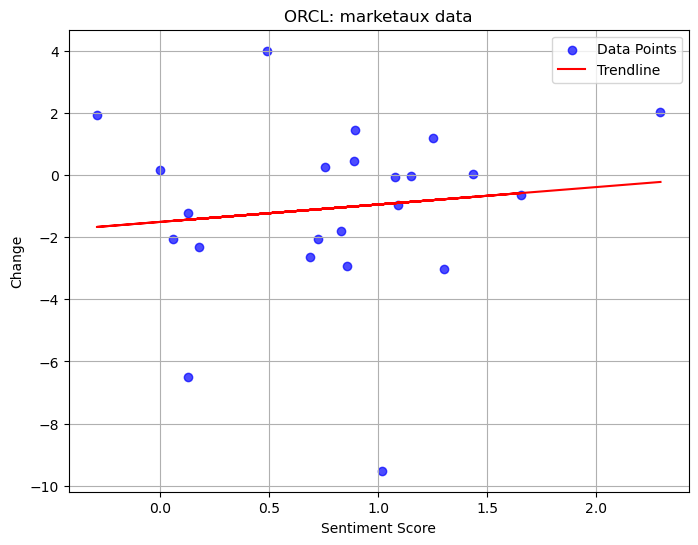

alphavantage data
sentiment_score:PearsonRResult(statistic=0.2619250604581041, pvalue=0.14089259714476474)


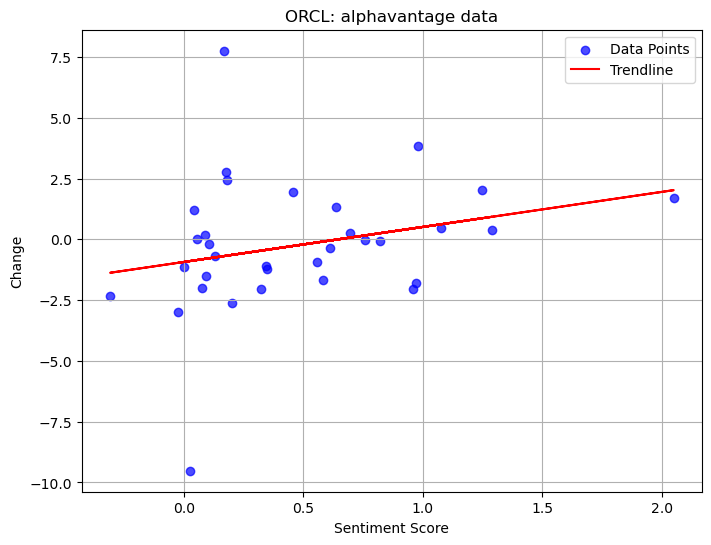

NVDA
market aux data
sentiment_score:PearsonRResult(statistic=0.12992548705346163, pvalue=0.5451143671288319)


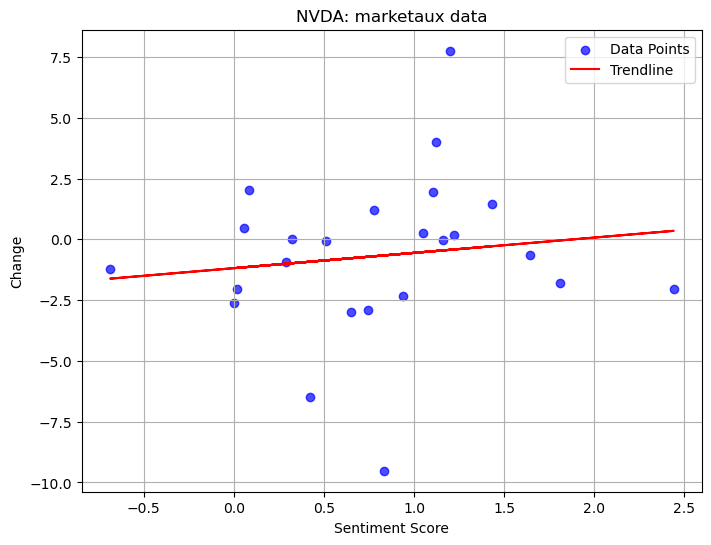

alphavantage data
sentiment_score:PearsonRResult(statistic=-0.07784224859048974, pvalue=0.677242197679343)


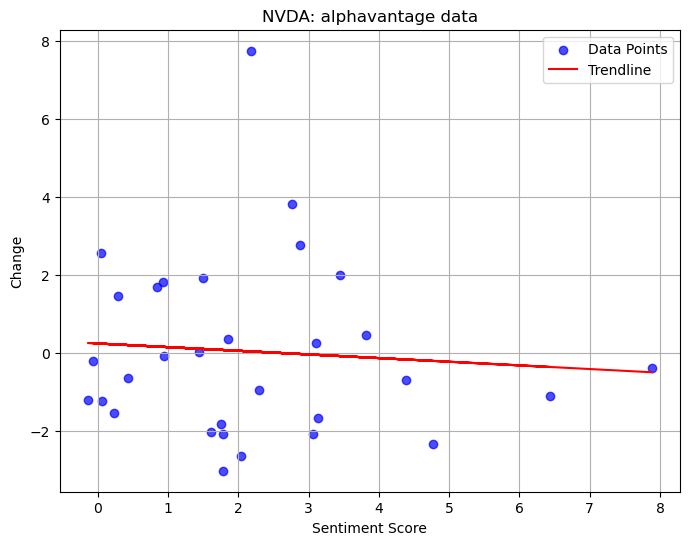

INTC
No columns to parse from file
No columns to parse from file
No columns to parse from file
market aux data
sentiment_score:PearsonRResult(statistic=0.033159849394558946, pvalue=0.8777523576365364)


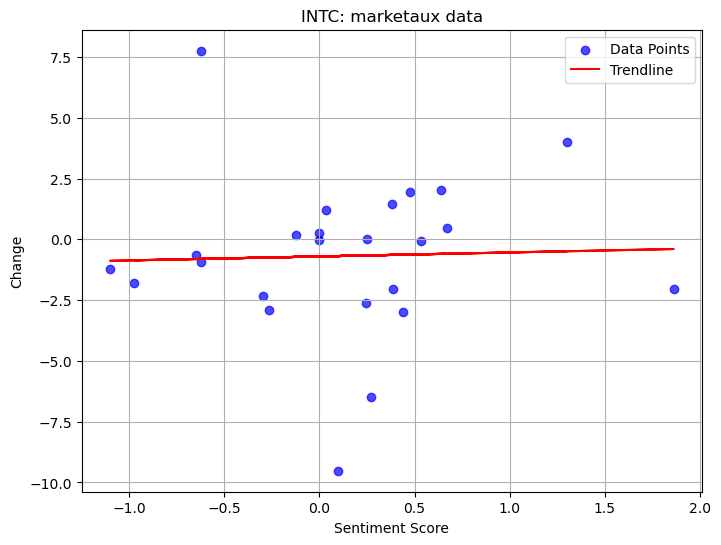

alphavantage data
sentiment_score:PearsonRResult(statistic=0.23438357368264703, pvalue=0.18212740931723778)


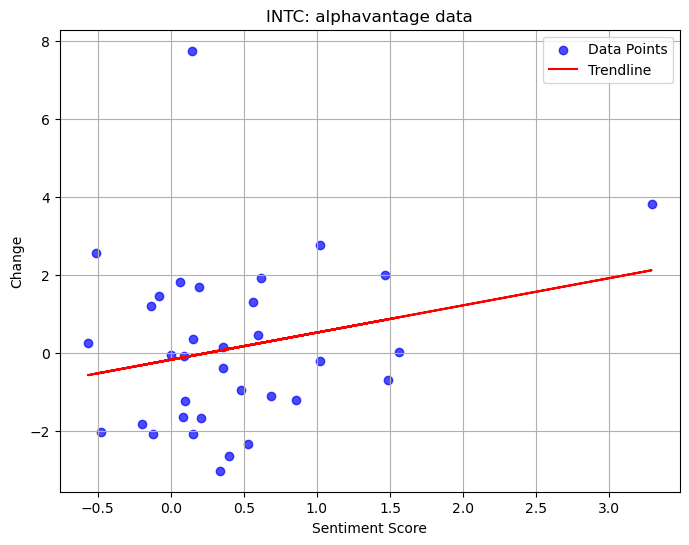

In [124]:
for ticker in tickers:
    print(ticker)
    df_stock = pd.read_csv(f"dataset/stocks/{ticker}.csv")
    df_stock_diff = get_stock_diff(df_stock)
    news_rel_mt = get_news_rel(ticker, FOLDER_MAUX)
    news_rel_alpha = get_news_rel(ticker, FOLDER_ALPHA)
    if news_rel_mt.empty or news_rel_alpha.empty:
        continue
    mt_senti = group_by_date(news_rel_mt, "sentiment_score")
    alpha_senti = group_by_date(news_rel_alpha, "sentiment_score")
    print("market aux data")
    a1 = calc_pearsonr(df_stock_simp, mt_senti, "sentiment_score")
    make_plot(a1, f"{ticker}: marketaux data")
    print("alphavantage data")
    a2 = calc_pearsonr(df_stock_simp, alpha_senti, "sentiment_score")
    make_plot(a2, f"{ticker}: alphavantage data")
    
    